In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Shivani
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
!pip install openpyxl --upgrade --pre
import openpyxl
airline = pd.read_excel(r"C:\Users\ACS\OneDrive\Desktop\data sets\EastWestAirlines.csv.xlsx",sheet_name=1,)

Defaulting to user installation because normal site-packages is not writeable


In [4]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


Data Preprocessing:

In [5]:
airline.describe()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
airline.duplicated().sum()

0

In [8]:
airline.drop(columns=['Qual_miles','cc2_miles','cc3_miles'],inplace=True)  #removed useless columns with no iqr values

In [9]:
airline

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,1,174,1,0,0,7000,0
1,2,19244,1,215,2,0,0,6968,0
2,3,41354,1,4123,4,0,0,7034,0
3,4,14776,1,500,1,0,0,6952,0
4,5,97752,4,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...
3994,4017,18476,1,8525,4,200,1,1403,1
3995,4018,64385,1,981,5,0,0,1395,1
3996,4019,73597,3,25447,8,0,0,1402,1
3997,4020,54899,1,500,1,500,1,1401,0


In [10]:
airline.isna().sum()

ID#                  0
Balance              0
cc1_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

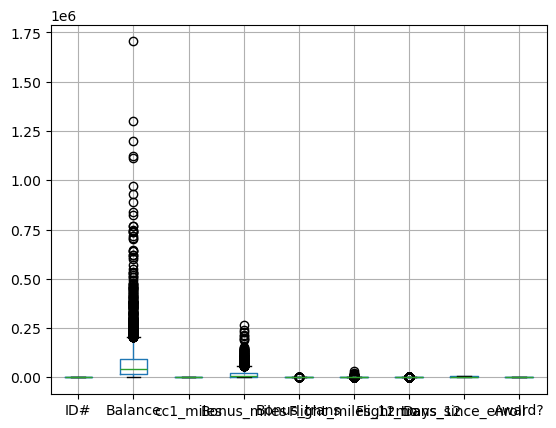

In [11]:
airline.boxplot()
plt.rcParams["figure.figsize"] = (20, 10)  #presence of outliers

In [12]:
def outlier_detection(data,colname):      #user defined function for outlier treatment
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme

In [13]:
outlier_detection(airline,airline.columns)


(ID#                  -2004.50
 Balance             -92287.25
 cc1_miles               -2.00
 Bonus_miles         -32575.75
 Bonus_trans            -18.00
 Flight_miles_12mo     -466.50
 Flight_trans_12         -1.50
 Days_since_enroll    -2860.75
 Award?                  -1.50
 dtype: float64,
 ID#                    6035.50
 Balance              203218.75
 cc1_miles                 6.00
 Bonus_miles           57626.25
 Bonus_trans              38.00
 Flight_miles_12mo       777.50
 Flight_trans_12           2.50
 Days_since_enroll     10981.25
 Award?                    2.50
 dtype: float64)

In [14]:
airline.loc[airline['Balance']>203218.75,'Balance'] = 203218.75

In [15]:
airline.loc[airline['Bonus_miles']>57626.25,'Bonus_miles']=57626.25


In [16]:
airline.loc[airline['Bonus_trans']>38.0,'Bonus_trans']=38.0

In [17]:
airline.loc[airline['Flight_miles_12mo']>777.5,'Flight_miles_12mo']=777.5

In [18]:
airline.loc[airline['Flight_trans_12']>2.5,'Flight_trans_12']=2.5

In [19]:
airline.loc[airline['Flight_trans_12']>2.5,'Flight_trans_12']=2.5

In [20]:
sns.boxplot(airline) #after outliers treatment

<Axes: >

clustering k means

In [21]:
airline

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143.0,1,174.0,1,0.0,0.0,7000,0
1,2,19244.0,1,215.0,2,0.0,0.0,6968,0
2,3,41354.0,1,4123.0,4,0.0,0.0,7034,0
3,4,14776.0,1,500.0,1,0.0,0.0,6952,0
4,5,97752.0,4,43300.0,26,777.5,2.5,6935,1
...,...,...,...,...,...,...,...,...,...
3994,4017,18476.0,1,8525.0,4,200.0,1.0,1403,1
3995,4018,64385.0,1,981.0,5,0.0,0.0,1395,1
3996,4019,73597.0,3,25447.0,8,0.0,0.0,1402,1
3997,4020,54899.0,1,500.0,1,500.0,1.0,1401,0


In [22]:
df1= airline      #saved for hierarchical
df2 = airline     #saved for DBSCAN

**K means clustering**

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_air= scaler.fit_transform(airline.iloc[:,0:9])

In [24]:
scaled_air

array([[-1.73512503, -0.60725829, -0.76957841, ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-1.73426342, -0.75894657, -0.76957841, ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-1.73340181, -0.38206963, -0.76957841, ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 1.72682006,  0.1675298 ,  0.68312117, ..., -0.62614341,
        -1.31560393,  1.30391816],
       [ 1.72768167, -0.15118775, -0.76957841, ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [ 1.72854328, -1.03556163, -0.76957841, ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

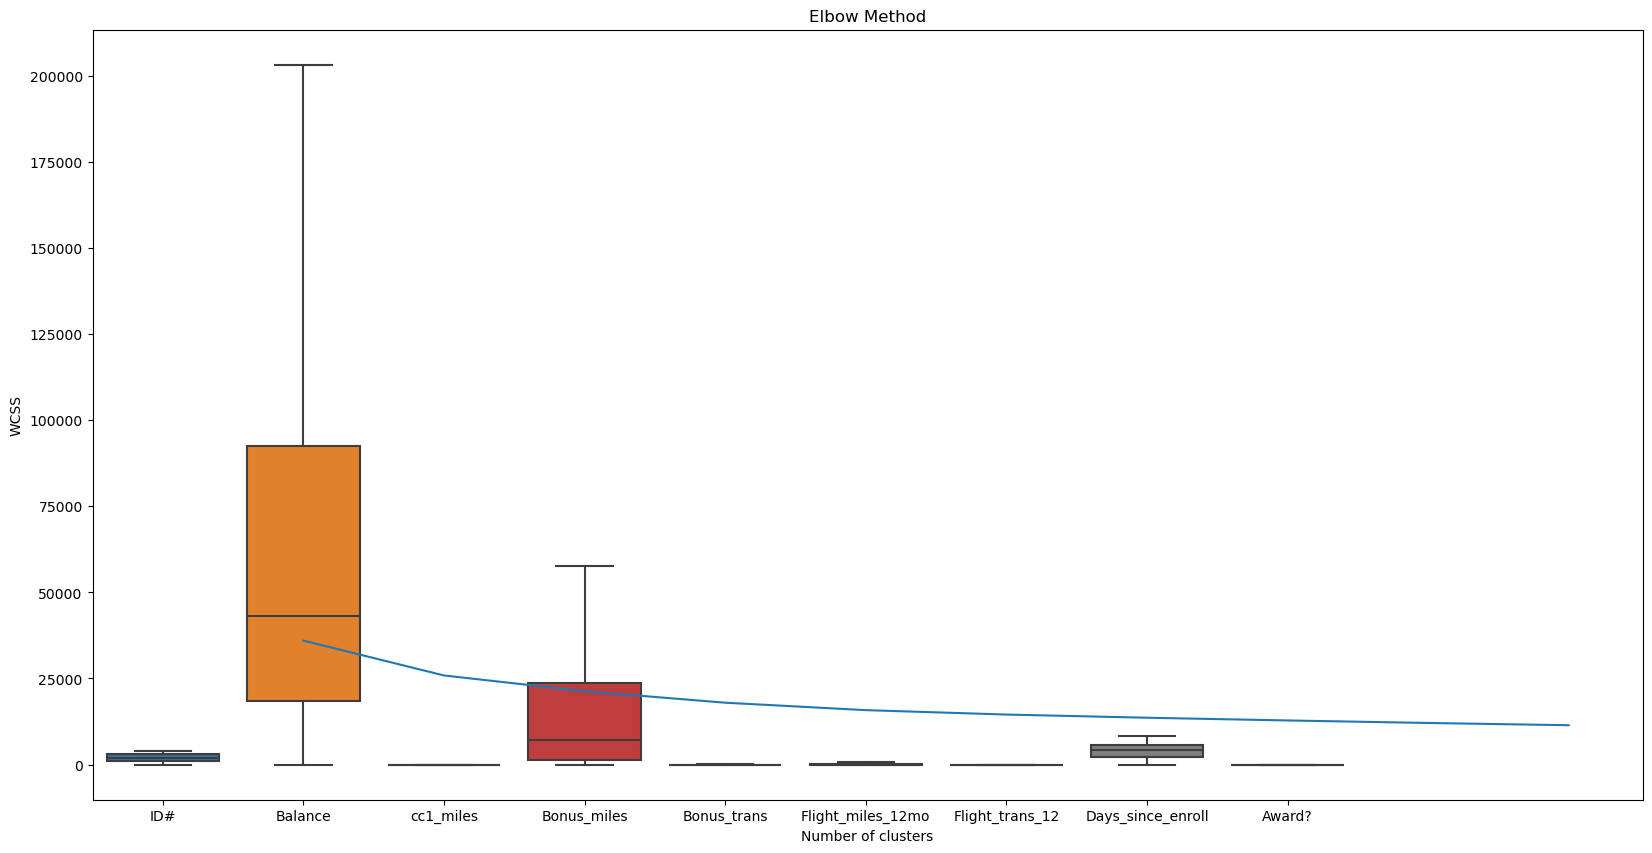

In [25]:
wcss = [] # within cluster sum of square. Initialize WCSS and begin the loop
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0) #max_iter=300 is default value.
    kmeans.fit(scaled_air) #  use fit method to fit the kmeans object to our scaled dataframe
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
wcss

[35991.0,
 25870.543977379428,
 21297.47835538591,
 17966.559489582185,
 15803.546276162893,
 14525.527307322835,
 13601.773166638644,
 12811.011663807423,
 12080.407791018359,
 11425.001952786295]

In [27]:
kmeans = KMeans(n_clusters=4,random_state=0) # pass no. of clusters as 4
predict=kmeans.fit_predict(scaled_air)# assign cluster numbers to universities

In [28]:
predict

array([3, 3, 3, ..., 0, 0, 0])

In [29]:
clusters_new = KMeans(n_clusters=3, random_state=0)
new_predict=clusters_new.fit_predict(scaled_air)

In [30]:
clusters_new.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
new_predict

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
airline['k_clusterid'] = new_predict

In [33]:
airline

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusterid
0,1,28143.0,1,174.0,1,0.0,0.0,7000,0,0
1,2,19244.0,1,215.0,2,0.0,0.0,6968,0,0
2,3,41354.0,1,4123.0,4,0.0,0.0,7034,0,0
3,4,14776.0,1,500.0,1,0.0,0.0,6952,0,0
4,5,97752.0,4,43300.0,26,777.5,2.5,6935,1,1
...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476.0,1,8525.0,4,200.0,1.0,1403,1,0
3995,4018,64385.0,1,981.0,5,0.0,0.0,1395,1,0
3996,4019,73597.0,3,25447.0,8,0.0,0.0,1402,1,0
3997,4020,54899.0,1,500.0,1,500.0,1.0,1401,0,0


In [34]:
airline.groupby('k_clusterid').agg(['mean']).reset_index()


,k_clusterid,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2383.265707,33615.042926,1.208153,4146.489329,6.378897,35.614149,0.142686,3433.192806,0.161631
1,1,1810.804819,97008.526205,2.224096,21038.505422,16.727711,694.833133,2.219277,4531.966265,0.659036
2,2,1462.348708,96315.805581,3.571033,32767.640452,17.238930,56.344557,0.208487,5120.276753,0.550738


In [35]:
airline[airline['k_clusterid']==0]

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusterid
0,1,28143.0,1,174.0,1,0.0,0.0,7000,0,0
1,2,19244.0,1,215.0,2,0.0,0.0,6968,0,0
2,3,41354.0,1,4123.0,4,0.0,0.0,7034,0,0
3,4,14776.0,1,500.0,1,0.0,0.0,6952,0,0
5,6,16420.0,1,0.0,0,0.0,0.0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476.0,1,8525.0,4,200.0,1.0,1403,1,0
3995,4018,64385.0,1,981.0,5,0.0,0.0,1395,1,0
3996,4019,73597.0,3,25447.0,8,0.0,0.0,1402,1,0
3997,4020,54899.0,1,500.0,1,500.0,1.0,1401,0,0


In [36]:
airline[airline['k_clusterid']==0].shape[0]

2085

In [37]:
airline[airline['k_clusterid']==2]

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusterid
6,7,84914.0,3,27482.00,25,0.0,0.0,6994,0,2
11,12,96522.0,5,57626.25,19,0.0,0.0,6924,1,2
12,13,43382.0,2,11150.00,20,0.0,0.0,6924,0,2
15,16,28495.0,4,49442.00,15,0.0,0.0,6912,1,2
16,17,51890.0,4,48963.00,16,0.0,0.0,6910,1,2
...,...,...,...,...,...,...,...,...,...,...
3931,3954,49519.0,3,25762.00,18,0.0,0.0,1522,1,2
3954,3977,33972.0,3,21029.00,29,0.0,0.0,1467,1,2
3966,3989,91605.0,4,37840.00,18,0.0,0.0,1444,0,2
3974,3997,58387.0,3,14581.00,38,0.0,0.0,1435,0,2


**Hierarchical**


In [38]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [39]:
df1

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusterid
0,1,28143.0,1,174.0,1,0.0,0.0,7000,0,0
1,2,19244.0,1,215.0,2,0.0,0.0,6968,0,0
2,3,41354.0,1,4123.0,4,0.0,0.0,7034,0,0
3,4,14776.0,1,500.0,1,0.0,0.0,6952,0,0
4,5,97752.0,4,43300.0,26,777.5,2.5,6935,1,1
...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476.0,1,8525.0,4,200.0,1.0,1403,1,0
3995,4018,64385.0,1,981.0,5,0.0,0.0,1395,1,0
3996,4019,73597.0,3,25447.0,8,0.0,0.0,1402,1,0
3997,4020,54899.0,1,500.0,1,500.0,1.0,1401,0,0


In [40]:
airline2= df1.drop(columns=['k_clusterid'])

In [41]:
airline2

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143.0,1,174.0,1,0.0,0.0,7000,0
1,2,19244.0,1,215.0,2,0.0,0.0,6968,0
2,3,41354.0,1,4123.0,4,0.0,0.0,7034,0
3,4,14776.0,1,500.0,1,0.0,0.0,6952,0
4,5,97752.0,4,43300.0,26,777.5,2.5,6935,1
...,...,...,...,...,...,...,...,...,...
3994,4017,18476.0,1,8525.0,4,200.0,1.0,1403,1
3995,4018,64385.0,1,981.0,5,0.0,0.0,1395,1
3996,4019,73597.0,3,25447.0,8,0.0,0.0,1402,1
3997,4020,54899.0,1,500.0,1,500.0,1.0,1401,0


In [42]:
# Customized / user defined Normalization function
# Here we can use built-in functions as well from sklearn but to show you how we can write customized function we used this code
def norm_func(i):# function name is norm_func, we can give any name here.
  x=(i-i.min())/(i.max()-i.min())# function name is norm_func, we can give any name here.
  return x


In [43]:
airline2['Days_since_enroll'].min(),airline2['Days_since_enroll'].max()

(2, 8296)

In [44]:
# Normalized data frame (considering the numerical part of data)
df_norm=norm_func(airline2.iloc[:,0:8])

In [45]:
dendrogram = sch.dendrogram(sch.linkage(df_norm,method='ward'))

In [46]:
df_norm

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.000000,0.138486,0.00,0.003019,0.026316,0.000000,0.0,0.843742
1,0.000249,0.094696,0.00,0.003731,0.052632,0.000000,0.0,0.839884
2,0.000498,0.203495,0.00,0.071547,0.105263,0.000000,0.0,0.847842
3,0.000746,0.072710,0.00,0.008677,0.026316,0.000000,0.0,0.837955
4,0.000995,0.481019,0.75,0.751394,0.684211,1.000000,1.0,0.835905
...,...,...,...,...,...,...,...,...
3994,0.999005,0.090917,0.00,0.147936,0.105263,0.257235,0.4,0.168917
3995,0.999254,0.316826,0.00,0.017023,0.131579,0.000000,0.0,0.167953
3996,0.999502,0.362157,0.50,0.441587,0.210526,0.000000,0.0,0.168797
3997,0.999751,0.270147,0.00,0.008677,0.026316,0.643087,0.4,0.168676


In [47]:
#create clusters
hc = AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage='ward')

In [48]:
hc

AgglomerativeClustering(metric='euclidean', n_clusters=4)

In [49]:
y_hc=hc.fit_predict(df_norm) # apply fit_predict method on dataset df_norm. We will get cluster nos. in y_hc
clusters=pd.DataFrame(y_hc,columns=['Cluster_No00'])  # append those no. of cluster numbers create dataframe

In [50]:
y_hc


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [51]:
clusters

,Cluster_No00
0,0
1,0
2,0
3,0
4,3
...,...
3994,1
3995,0
3996,0
3997,1


In [52]:
airline2['h_clustered']=clusters

In [53]:
airline2

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clustered
0,1,28143.0,1,174.0,1,0.0,0.0,7000,0,0
1,2,19244.0,1,215.0,2,0.0,0.0,6968,0,0
2,3,41354.0,1,4123.0,4,0.0,0.0,7034,0,0
3,4,14776.0,1,500.0,1,0.0,0.0,6952,0,0
4,5,97752.0,4,43300.0,26,777.5,2.5,6935,1,3
...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476.0,1,8525.0,4,200.0,1.0,1403,1,1
3995,4018,64385.0,1,981.0,5,0.0,0.0,1395,1,0
3996,4019,73597.0,3,25447.0,8,0.0,0.0,1402,1,0
3997,4020,54899.0,1,500.0,1,500.0,1.0,1401,0,1


In [54]:
airlines=airline2.sort_values('h_clustered')  #checking model
airlines.iloc[:,[0,9]]

,ID#,h_clustered
0,1,0
2504,2523,0
2505,2524,0
2507,2526,0
2508,2527,0
...,...,...
725,735,3
718,728,3
2938,2960,3
2831,2853,3


**DBSCAN clustering **


In [55]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

In [56]:
airline3= airline2.drop(columns=['h_clustered'])

In [57]:
airline3

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143.0,1,174.0,1,0.0,0.0,7000,0
1,2,19244.0,1,215.0,2,0.0,0.0,6968,0
2,3,41354.0,1,4123.0,4,0.0,0.0,7034,0
3,4,14776.0,1,500.0,1,0.0,0.0,6952,0
4,5,97752.0,4,43300.0,26,777.5,2.5,6935,1
...,...,...,...,...,...,...,...,...,...
3994,4017,18476.0,1,8525.0,4,200.0,1.0,1403,1
3995,4018,64385.0,1,981.0,5,0.0,0.0,1395,1
3996,4019,73597.0,3,25447.0,8,0.0,0.0,1402,1
3997,4020,54899.0,1,500.0,1,500.0,1.0,1401,0


In [58]:
sns.pairplot(airline3)

In [59]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(airline3)
x

array([[-1.73512503, -0.60725829, -0.76957841, ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-1.73426342, -0.75894657, -0.76957841, ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-1.73340181, -0.38206963, -0.76957841, ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 1.72682006,  0.1675298 ,  0.68312117, ..., -0.62614341,
        -1.31560393,  1.30391816],
       [ 1.72768167, -0.15118775, -0.76957841, ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [ 1.72854328, -1.03556163, -0.76957841, ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

In [60]:
from sklearn.cluster import DBSCAN


In [61]:
db=DBSCAN(eps=0.3,min_samples=3)
y=db.fit_predict(x)
y

array([ 0,  0, -1, ..., -1, -1,  0], dtype=int64)

In [62]:
plt.scatter(x[:,0],x[:,4],c=y,cmap='viridis')

In [63]:
x

array([[-1.73512503, -0.60725829, -0.76957841, ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-1.73426342, -0.75894657, -0.76957841, ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-1.73340181, -0.38206963, -0.76957841, ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 1.72682006,  0.1675298 ,  0.68312117, ..., -0.62614341,
        -1.31560393,  1.30391816],
       [ 1.72768167, -0.15118775, -0.76957841, ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [ 1.72854328, -1.03556163, -0.76957841, ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

In [64]:
from sklearn.metrics import silhouette_score

In [65]:
silhouette_score (x,y) # parameters: x:standardized version of data, y:cluster lables
# score is approximately equal or near to zero i.e. clusters are overlapping

-0.49840891994422226

**hyperparameter tuning**

In [66]:
from sklearn.neighbors import NearestNeighbors
# NearestNeighbors will calculate avg distance by considering nearest data point

In [67]:
neighbor = NearestNeighbors(n_neighbors = 3).fit(x)# fit will calculate distance using euclidean distance method
# n_neighbors:min sample. Calculate nearest 3 data points of each data point
# eps values will be selected randomly by algorithm

In [68]:
# distances (calculated with eps value) are stored in neighbor
d,index = neighbor.kneighbors(x)
# kneighbors() will show distances.
# It returns 2 values, d:euclidean distances: 3 distances are there in every list as we have selected min sample as 3
# row index: which data point is close to which other data point

In [69]:
neighbor.kneighbors(x)

(array([[0.        , 0.18786764, 0.21469982],
        [0.        , 0.134725  , 0.18786764],
        [0.        , 0.23361242, 0.36010907],
        ...,
        [0.        , 0.2550823 , 0.37607587],
        [0.        , 0.48487137, 0.65876427],
        [0.        , 0.03911926, 0.10499643]]),
 array([[   0,    1,   14],
        [   1,    3,    0],
        [   2,   13,  338],
        ...,
        [3996, 3877, 3800],
        [3997, 3623, 3882],
        [3998, 3981, 3951]], dtype=int64))

In [70]:
d

array([[0.        , 0.18786764, 0.21469982],
       [0.        , 0.134725  , 0.18786764],
       [0.        , 0.23361242, 0.36010907],
       ...,
       [0.        , 0.2550823 , 0.37607587],
       [0.        , 0.48487137, 0.65876427],
       [0.        , 0.03911926, 0.10499643]])

In [71]:
index

array([[   0,    1,   14],
       [   1,    3,    0],
       [   2,   13,  338],
       ...,
       [3996, 3877, 3800],
       [3997, 3623, 3882],
       [3998, 3981, 3951]], dtype=int64)

In [72]:
distance = np.sort(d[:,1])

In [73]:
distance

array([0.00342802, 0.00342802, 0.0035639 , ..., 1.87883289, 1.88525691,
       2.14895892])

In [74]:
plt.plot(distance)
plt.axhline(y=1, linestyle = '--', color='red') # y=1 means draw horizontal lint at eps=2
plt.xlabel('Index')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

Text(0.5, 1.0, 'K-Distance Graph')

In [75]:
db = DBSCAN(eps=1.5,min_samples=3) # consider eps=1, try min_samples as 7 or 13 by rule 2 and 3 and check silhouette score
yp = db.fit_predict(x)
yp
# outliers are reduced, Max clusters:1 i.e. only one cluster: cluster 0

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [76]:

plt.scatter(x[:,0],x[:,4],c=yp,cmap='viridis') # try cmap=rainbow

In [77]:
silhouette_score(x,yp)  #silhoutte score is imporved from -0.49840891994422226 to this 0.1902446315272132 by hypertuning

0.1902446315272132

**Cluster analysis and interpretation :**




In [78]:
airline['k_clusterid'].value_counts()  #k means clusters

k_clusterid
0    2085
2    1084
1     830
Name: count, dtype: int64

In [79]:
airline2['h_clustered'].value_counts()   #hierarchical clusters

h_clustered
0    2039
1     779
2     725
3     456
Name: count, dtype: int64

In [80]:
#these two are cluster making in tabular form. visualisation and interpretation of these clustering is mentioned according to clustering division section.
#before and after of DBSCAN visualisation , hierarchical division and k means out put evaluation has been performed at the end of every topic.

In [81]:
#evaluation and perfomance improvement according to requirement has been shown in respective section.